# Practical Lab: Linear Regression by using the gradient descent algorithm

## Utils

In [44]:
from sklearn import datasets # data
import os # directory management
import pandas as pd # data analysis
from scipy import stats # descriptive statistics
import matplotlib.pyplot as plt # figures
import numpy as np # maths
import seaborn as sns

## Data

In [45]:
#-- Reading the (training) data in a data frame
path=r"C:\Users\Admin\OneDrive - Université Bretagne Sud\CLASSES\MACHINE LEARNING\Linear regression\pm25_train_data.csv"
training=pd.read_csv(path, sep=";")
#training.head
training.columns

Index(['PM2.5', 'SO2', 'NO2', 'CO', 'O3', 'temperature', 'pressure',
       'dew point', 'rainfall', 'windspeed'],
      dtype='object')

In [46]:
training.head()

,PM2.5,SO2,NO2,CO,O3,temperature,pressure,dew point,rainfall,windspeed
0,24.0,7.0,13.0,300.0,74.0,3.9,1027.3,-19.7,0.0,5.1
1,93.0,25.0,76.0,900.0,22.0,2.7,1027.3,-16.4,0.0,2.7
2,117.0,77.0,99.0,1600.0,14.0,13.8,1012.5,-13.3,0.0,1.1
3,58.0,12.0,14.0,400.0,77.0,14.2,1018.9,-13.9,0.0,2.7
4,226.0,104.0,136.0,2299.0,15.0,11.9,1009.7,-7.5,0.0,1.3


### Analyse and select the data to be studied

In [47]:
#-- Display some statistics on the data by using the describe function on the dataframe
training.describe()

,PM2.5,SO2,NO2,CO,O3,temperature,pressure,dew point,rainfall,windspeed
count,11918.000000,11667.000000,11636.000000,11462.000000,11677.000000,11898.000000,11898.000000,11898.000000,11898.000000,11900.000000
mean,144.962326,21.960768,44.788865,1165.367650,73.894402,17.924920,1009.787557,2.765969,0.047630,2.243664
std,103.807565,27.065010,33.186310,1019.736671,51.840188,10.751675,10.074917,13.483896,0.532651,1.346997
min,3.000000,0.571200,2.000000,100.000000,0.214200,-6.800000,984.500000,-31.300000,0.000000,0.000000
25%,71.000000,4.000000,19.000000,500.000000,34.000000,8.200000,1001.800000,-8.300000,0.000000,1.300000
50%,120.000000,12.000000,37.000000,900.000000,66.000000,19.900000,1009.400000,3.100000,0.000000,1.900000
75%,192.000000,29.000000,62.000000,1500.000000,103.000000,27.400000,1017.600000,15.000000,0.000000,2.700000
max,844.000000,224.000000,273.000000,10000.000000,345.000000,39.800000,1036.300000,28.500000,31.200000,12.900000


In [48]:
#Clean up the data to remove the null values as noted in the count of a number of variables
training=training.dropna()
training.describe()

,PM2.5,SO2,NO2,CO,O3,temperature,pressure,dew point,rainfall,windspeed
count,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000
mean,144.785609,21.803471,44.614596,1165.918100,74.123981,17.943513,1009.810802,2.826747,0.046918,2.235968
std,102.926739,26.880259,32.895568,1010.439512,51.904421,10.751609,10.075603,13.450111,0.535652,1.337821
min,3.000000,0.856800,2.000000,100.000000,0.214200,-6.800000,984.500000,-31.300000,0.000000,0.000000
25%,71.000000,4.000000,19.000000,500.000000,34.000000,8.200000,1001.800000,-8.200000,0.000000,1.300000
50%,120.000000,12.000000,36.000000,900.000000,66.000000,20.000000,1009.300000,3.100000,0.000000,1.900000
75%,192.000000,28.000000,62.000000,1500.000000,103.000000,27.400000,1017.600000,15.000000,0.000000,2.700000
max,844.000000,224.000000,273.000000,10000.000000,345.000000,39.800000,1036.300000,28.500000,31.200000,12.900000


In [49]:
#-- Save the explanatory variables in a variable X (and their names in a varaible feature_names), and the target variable in Y
feature_names=training.columns[1:]
print(feature_names)

Index(['SO2', 'NO2', 'CO', 'O3', 'temperature', 'pressure', 'dew point',
       'rainfall', 'windspeed'],
      dtype='object')


In [50]:
X=training.iloc[1:,1:].values
print(X)

[[ 2.50e+01  7.60e+01  9.00e+02 ... -1.64e+01  0.00e+00  2.70e+00]
 [ 7.70e+01  9.90e+01  1.60e+03 ... -1.33e+01  0.00e+00  1.10e+00]
 [ 1.20e+01  1.40e+01  4.00e+02 ... -1.39e+01  0.00e+00  2.70e+00]
 ...
 [ 4.60e+01  9.90e+01  3.00e+03 ... -7.10e+00  0.00e+00  1.30e+00]
 [ 7.00e+00  1.50e+01  5.00e+02 ... -1.08e+01  0.00e+00  4.10e+00]
 [ 1.20e+01  5.40e+01  1.20e+03 ... -1.03e+01  0.00e+00  1.30e+00]]


In [51]:

Y=training['PM2.5'].values
print(Y)

[ 24.  93. 117. ... 543. 505. 227.]


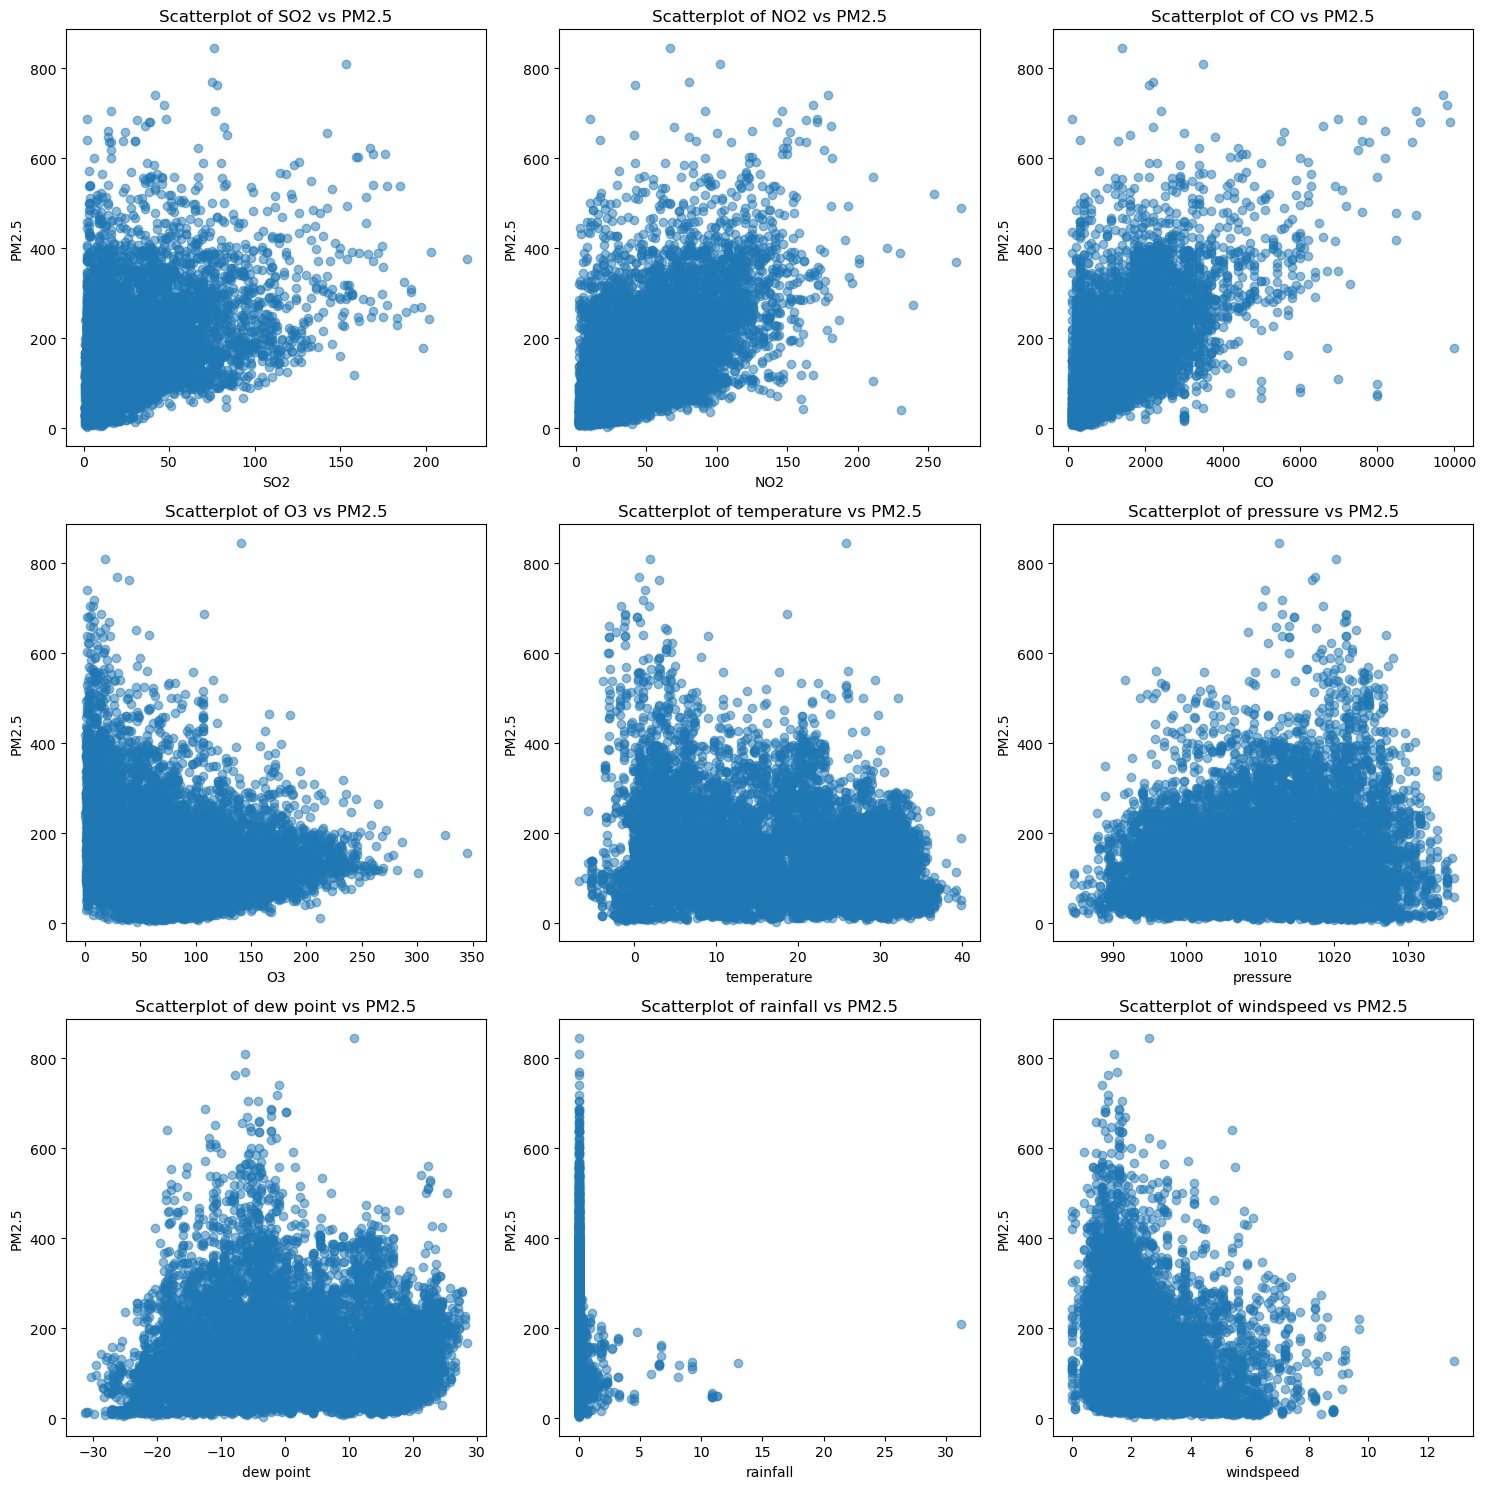

In [52]:

explanatory_variables = feature_names
dependent_variable = "PM2.5"

# Create a figure with subplots
plt.figure(figsize=(15,15))

# Scatterplots for each explanatory variable
for i, var in enumerate(explanatory_variables):
    plt.subplot(331 + i)  # Create subplots in a 1x3 grid (adjust as needed)
    plt.scatter(training[var], training[dependent_variable], alpha=0.5)
    plt.xlabel(var)
    plt.ylabel(dependent_variable)
    plt.title(f'Scatterplot of {var} vs {dependent_variable}')

# Show the plots
plt.tight_layout()
plt.show()


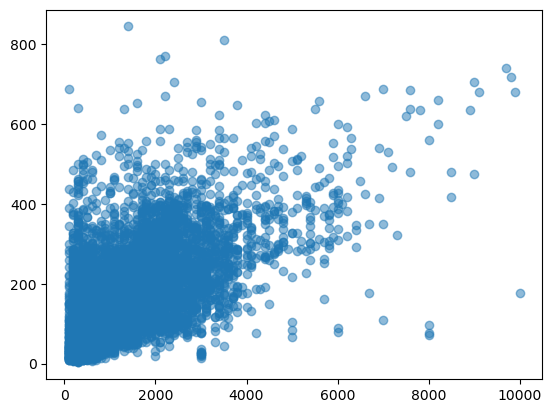

In [53]:
#-- Select the explanatory variables for the simple linear regression
explanatory_variable_linear="CO"
plt.scatter(training[explanatory_variable_linear], training[dependent_variable], alpha=0.5)
plt.show()

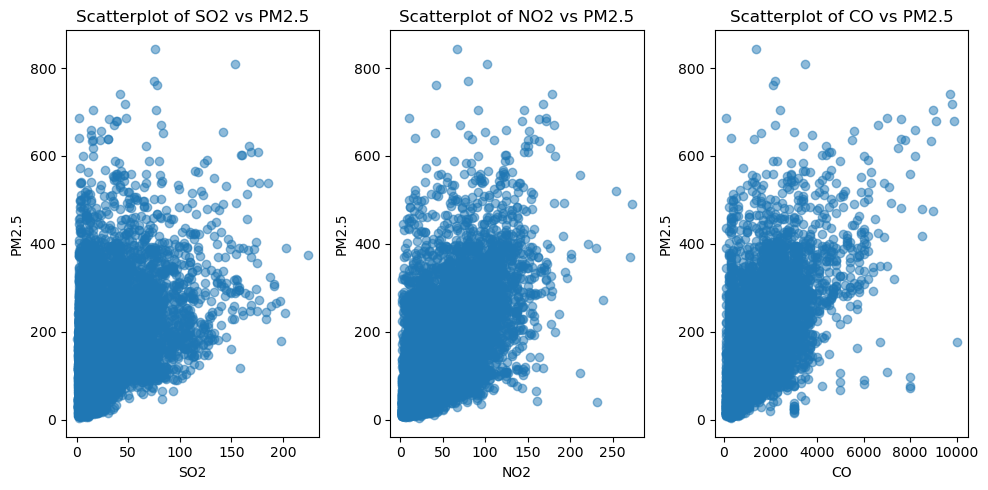

In [54]:
#-- Select the explanatory variables for the multiple linear regression, and display the scatter plots
explanatory_variables_multi = ["SO2","NO2","CO"]

# Create a figure with subplots
plt.figure(figsize=(10,5))

# Scatterplots for each explanatory variable
for i, var in enumerate(explanatory_variables_multi):
    plt.subplot(131 + i)  # Create subplots in a 1x3 grid (adjust as needed)
    plt.scatter(training[var], training[dependent_variable], alpha=0.5)
    plt.xlabel(var)
    plt.ylabel(dependent_variable)
    plt.title(f'Scatterplot of {var} vs {dependent_variable}')

# Show the plots
plt.tight_layout()
plt.show()




In [55]:
#-- Extract the data and creates two X matrices that will be used for the regression
#---- Xs for simple lin reg and Xm for multiple lin reg

X_multi=training[explanatory_variables_multi].values
X_simple=training[explanatory_variable_linear].values.reshape(-1, 1)
#-- Check the size of both matrices
print(X_multi.shape,X_simple.shape)




(11160, 3) (11160, 1)


As noted at X.describe, the data scale for the variables is differny hence we normalise: (X-Xbar)/standard deviation

In [56]:
#--- Write the standardisation function to mean-center the X data
def standardisation(X):
    return (X-np.mean(X))/np.std(X, ddof=1)

    
    
#-- Test 1 - simple lin reg
#print(type(Xs))
Xs_normalised=standardisation(X_simple)
#-- Test 2 - multiple lin reg
Xm_normalised=standardisation(X_multi)




In [69]:
#-- Preparing the matrix to be used for the gradient descent algorithm
#by adding the ones columns such that b0 will be multiplied by one. Hint:use stack/hstack/vstack
ones=np.ones(len(Xs_normalised))
Xs=np.column_stack((ones,Xs_normalised))
Xm=np.column_stack((ones,Xm_normalised))

#-- Test 1 - simple lin reg
print("Simple Regression:",Xs)

#-- Test 2 - multiple lin reg
print("Multiple Regression:",Xm)



Simple Regression: [[ 1.         -0.85697173]
 [ 1.         -0.26317073]
 [ 1.          0.42959712]
 ...
 [ 1.          1.8151328 ]
 [ 1.         -0.65903806]
 [ 1.          0.03372978]]
Multiple Regression: [[ 1.         -0.51028573 -0.50270308 -0.13999946]
 [ 1.         -0.48753777 -0.42308521  0.61826595]
 [ 1.         -0.42182143 -0.39401837  1.50290893]
 ...
 [ 1.         -0.46099848 -0.39401837  3.27219489]
 [ 1.         -0.51028573 -0.50017553  0.11275568]
 [ 1.         -0.50396685 -0.45088827  0.99739866]]


## Least squares or maximum likelihood solution

In [16]:
#-- To compare the results of the gradient descent algorithm, we will first implement an exact solution with the maximum likelihood
#-- Formulae recall: (X^T X)^-1 X^T Y
def coef_ml():

    
    
#-- Test 1  - simple reg

#-- Test 2 - multiple reg

#-- (We can also use the native functions of Scikit-Learn, but they are more parameters that needs to be tuned)

IndentationError: expected an indented block (2267797359.py, line 11)

## Gradient descent algorithm

In the following, we will implement several functions to apply linear regression.
These functions should be **generic** and work for any number of explanatory variables. You should be able to apply them to Xs and Xm standardized variables. 

WARNING: parameters of the functions needs to be completed

To test my understanding of the concept of gradient descent algorithm, I tried the implementation on a simple linear regression
yhat=b0+b1*xi
sum of squared residuals=np.sum(yi-yhat)**2
loss=(1/m)*sum of squared residuals where m is x.shape[0]
gradient descent function would be denoted as new parameter=former parameter-(learning_rate)*(1/m)*partail derivative of the sum of squared residauls with respect to the parameters

In [62]:
#initialise the parameters
b0=0
b1=0
learning_rate=0.1
# Generate some sample data



#define the gradient descent function
def gradient_desc(b0,b1,x,y,learning_rate):
    dldb0=0
    dldb1=0
    m=x.shape[0]

    for xi,yi in zip(x,y):
        #parial derivatives of the mean squared residuals using the chain rule concept
        dldb0 += -2*(yi-(b0+b1*xi))
        dldb1 += 2*xi*(yi-(b0+b1*xi))
        

        #update th values of b0 and b1 iteratively
    b0=b0-learning_rate*(1/m)*dldb0
    b1=b1-learning_rate*(1/m)*dldb1

    return b0,b1



In [63]:
#-- Test on a small dataset
x_test = np.random.rand(10,1)
y_test = 2*x_test+np.random.rand()
for epoch in range(1000):
    #use current parameters to make predictions on training data
    yhat=(B1*x_test+B0)
    #compute loss between true y and the predicted y(yhat)
    m=Xs.shape[0]
    loss=np.divide(np.sum((y_test-yhat)**2,axis=0),m)
    #update parameters
    B0,B1=gradient_desc(b0,b1,x_test,y_test,learning_rate)
    print(f'{epoch} loss is {loss}, parameters are B0:{B0} and B1:{B1}')
    

0 loss is [0.00350077], parameters are B0:[0.42141263] and B1:[-0.29305126]
1 loss is [0.0034534], parameters are B0:[0.42141263] and B1:[-0.29305126]
2 loss is [0.0034534], parameters are B0:[0.42141263] and B1:[-0.29305126]
3 loss is [0.0034534], parameters are B0:[0.42141263] and B1:[-0.29305126]
4 loss is [0.0034534], parameters are B0:[0.42141263] and B1:[-0.29305126]
5 loss is [0.0034534], parameters are B0:[0.42141263] and B1:[-0.29305126]
6 loss is [0.0034534], parameters are B0:[0.42141263] and B1:[-0.29305126]
7 loss is [0.0034534], parameters are B0:[0.42141263] and B1:[-0.29305126]
8 loss is [0.0034534], parameters are B0:[0.42141263] and B1:[-0.29305126]
9 loss is [0.0034534], parameters are B0:[0.42141263] and B1:[-0.29305126]
10 loss is [0.0034534], parameters are B0:[0.42141263] and B1:[-0.29305126]
11 loss is [0.0034534], parameters are B0:[0.42141263] and B1:[-0.29305126]
12 loss is [0.0034534], parameters are B0:[0.42141263] and B1:[-0.29305126]
13 loss is [0.0034534

In [72]:

betas_s=[1,2]
betas_m=[1,2,3,4]
#-- Model
def f(X,betas):
    Yhat=np.dot(X,betas)
    return Yhat

#-- Test 1 - simple reg
Yhat_s=f(Xs,betas_s)
print("Simple regression predictions:",Yhat_s)
#-- Test 2 - multiple reg
Yhat_m=f(Xm,betas_m)
print("Mutli regression predictions:",Yhat_m)


Simple regression predictions: [-0.71394347  0.47365855  1.85919423 ...  4.6302656  -0.31807613
  1.06745955]
Mutli regression predictions: [-2.08867852  1.22873265  4.98593776 ... 11.98472751 -1.07007532
  2.62899611]


In [73]:
#-- Cost function
def cost(Y,Yhat):
    m=Y.shape[0]
    return 1/m*np.sum((Yhat-Y)**2)

#-- Test 1 - simple reg
cost_s=cost(Yhat_s,Y)
print("The cost:Simple regression is",cost_s)
#-- Test 2 - multiple reg
cost_m=cost(Yhat_m,Y)
print("The cost:Multi regression is",cost_m)


The cost:Simple regression is 31009.17662441931
The cost:Multi regression is 30190.207845189554


In [74]:
#-- Computation of the gradient
def grad(X,Y,Yhat):
    m=X.shape[0]
    return 1/m*np.dot((Yhat-Y),X)

#-- Test 1 - simple reg
grad_s=grad(Xs,Y,Yhat_s)
print("The gradient:Multi regression is",grad_s)


#-- Test 2 - multiple reg
grad_m=grad(Xm,Y,Yhat_m)
print("The gradient:Multi regression is",grad_m)


The gradient:Multi regression is [-143.78560932  -63.52236316]
The gradient:Multi regression is [-142.33970507   68.38793866   63.58172284 -212.81314925]


In [ ]:
#-- Gradient descent algorithm
def grad_descent(X,Y,betas,learning_rate,step_size):
    #random values as initial parameters
    learning_rate=0.01
    
    epoch=1000

    for epoch in range(num_epochs):
        # Compute predictions using the current parameters
        Yhat = f(X, betas)
        
        # Compute the gradient of the loss function
        gradient = grad(X, Y, Yhat)
        
        # Update the parameters (betas) using the gradient and learning rate
        betas -= learning_rate * gradient
      
    
    return betas

#-- Test 1  - simple reg
betas = np.random.rand(Xs.shape[1])


#-- Test 2 - multiple reg
betas = np.random.rand(Xm.shape[1])


## Experiment with several initialisations: visualisation of the cost function and parameter values during the iterations

In [ ]:
#-- Test 1  - simple reg


#-- Test 2 - multiple reg

**Notes:**


## Experiment with several learning rates: visualisation of the cost function and parameter values during the iterations

In [ ]:
#-- Test 1  - simple reg


#-- Test 2 - multiple reg


**Notes:**

## Notes
**on the choice of the stopping criterion:**





**on the data normalisation:**





**Notes:**